# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

In [61]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
pd.set_option('max_columns', 50)
from scipy.stats import t
from scipy.stats import ttest_1samp
import seaborn as sns
import math as m

In [74]:
wnba['Pos'].unique()

array(['F', 'G/F', 'G', 'C', 'F/C'], dtype=object)

### Load the dataset

Load the cleaned dataset.

In [5]:
#your code here
wnba = pd.read_csv('../data/wnba_clean.csv')
wnba.corr()

,Unnamed: 0,Height,Weight,BMI,Age,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
Unnamed: 0,1.000000,-0.099244,-0.128747,-0.094033,0.167442,0.216646,0.071533,0.012228,0.047923,-0.141197,0.107164,0.119363,0.012541,0.098487,0.070897,0.019127,0.040547,0.020347,0.027612,0.054676,0.103497,-0.038341,0.058330,0.044758,0.006504,-0.087204
Height,-0.099244,1.000000,0.770489,0.163703,-0.107125,-0.146742,-0.140038,-0.048719,-0.147097,0.233682,-0.328597,-0.359546,-0.255198,-0.059440,-0.027620,-0.274055,0.353680,0.221064,0.272597,-0.445325,-0.181034,0.350921,-0.211953,-0.087219,0.200338,0.081493
Weight,-0.128747,0.770489,1.000000,0.752237,-0.049890,-0.214920,-0.233388,-0.148116,-0.231564,0.214274,-0.341832,-0.374683,-0.237746,-0.117581,-0.094195,-0.184566,0.238818,0.080622,0.134072,-0.445231,-0.259023,0.172917,-0.280432,-0.175402,0.104744,0.000162
BMI,-0.094033,0.163703,0.752237,1.000000,0.043729,-0.176460,-0.210939,-0.176812,-0.201462,0.083570,-0.189552,-0.208457,-0.093043,-0.112065,-0.107608,-0.002148,0.010999,-0.091939,-0.063488,-0.237706,-0.210581,-0.089385,-0.217438,-0.177784,-0.042477,-0.076725
Age,0.167442,-0.107125,-0.049890,0.043729,1.000000,0.125768,0.239304,0.169818,0.168012,0.121423,0.191551,0.186789,0.036811,0.105345,0.083017,-0.013643,0.009165,0.109977,0.082987,0.252346,0.205229,0.020437,0.194990,0.171281,-0.001498,0.089587
Games Played,0.216646,-0.146742,-0.214920,-0.176460,0.125768,1.000000,0.720852,0.577032,0.612887,-0.007503,0.365068,0.397066,0.159981,0.461075,0.489715,0.364616,0.454058,0.542430,0.538318,0.438520,0.564111,0.302149,0.623669,0.574315,0.203783,0.054592
MIN,0.071533,-0.140038,-0.233388,-0.210939,0.239304,0.720852,1.000000,0.909341,0.925602,0.197540,0.552407,0.566441,0.276086,0.761087,0.775032,0.315368,0.570110,0.785981,0.752312,0.730973,0.831106,0.477939,0.888612,0.910739,0.442809,0.113579
FGM,0.012228,-0.048719,-0.148116,-0.176812,0.169818,0.577032,0.909341,1.000000,0.966875,0.304228,0.515272,0.504907,0.259767,0.806854,0.816840,0.282001,0.592976,0.819473,0.783919,0.636255,0.730659,0.573590,0.854568,0.983840,0.602962,0.163950
FGA,0.047923,-0.147097,-0.231564,-0.201462,0.168012,0.612887,0.925602,0.966875,1.000000,0.147302,0.623531,0.637468,0.301783,0.822308,0.824340,0.316079,0.499610,0.756413,0.708533,0.688914,0.765703,0.482597,0.871584,0.975606,0.495464,0.154574
FG%,-0.141197,0.233682,0.214274,0.083570,0.121423,-0.007503,0.197540,0.304228,0.147302,1.000000,-0.125808,-0.183280,-0.030032,0.138890,0.159965,-0.181398,0.372366,0.327976,0.356356,0.044007,0.092710,0.321739,0.175041,0.241644,0.304268,0.040281


# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

In [20]:
# your answer here
wnba['Weight'].mean()

78.97887323943662

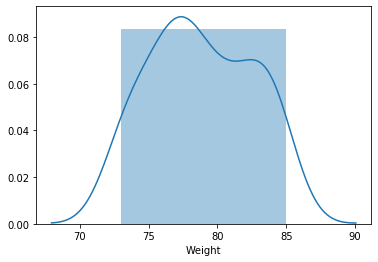

In [72]:
w = wnba[(wnba['Weight']>wnba['Weight'].quantile(.25))&(wnba['Weight']<wnba['Weight'].quantile(.75))]
#w['Weight'].hist(bins=13)
sns.distplot((w['Weight']), bins=1)

**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

In [21]:
# your code here
t.interval(alpha=0.95, df=(len(wnba)-1), loc=np.mean(wnba['Weight']), scale=np.std(wnba['Weight']))

(57.31699577297121, 100.64075070590204)

**What can you say about these results?**

In [22]:
#your-answer-here

# These results show that my sister's weight is well below average, and outside of the confidence interval
# By the looks of it, this would mean that my sister will struggle playing basketball proffessionally
# Despite the initial observations, I will attempt to disprove it and check wether she actually stands a chance.

**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

In [23]:
# This shows that there are porffessional player with a much lower weight than my sister, making it possible for her.
wnba['Weight'].min()

55

In [24]:
wnba['Weight'].describe()

count    142.000000
mean      78.978873
std       10.996110
min       55.000000
25%       71.500000
50%       79.000000
75%       86.000000
max      113.000000
Name: Weight, dtype: float64

In [25]:
# In fact, around 19% of professional players have a lower weight than my sister
wnba['Weight'].quantile(.19)

67.78999999999999

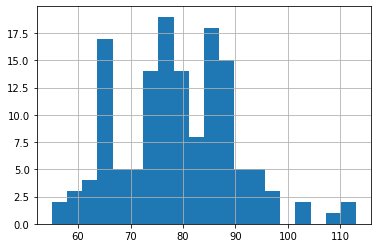

In [26]:
# Interestingly, we can see a frequency spike aroun the 61-67kg weight
wnba['Weight'].hist(bins=20)

In [73]:
# Interestingly, we can see that all the players under 67kg are in the same position 
wnba[wnba['Weight']<=67]

,Unnamed: 0,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
5,5,Alexis Peterson,SEA,G,170,63,21.799308,US,"June 20, 1995",22,Syracuse,R,14,90,9,34,26.5,2,9,22.2,6,6,100.0,3,13,16,11,5,0,11,26,0,0
7,7,Allie Quigley,CHI,G,178,64,20.199470,US,"June 20, 1986",31,DePaul,8,26,847,166,319,52.0,70,150,46.7,40,46,87.0,9,83,92,95,20,13,59,442,0,0
20,20,Bria Hartley,NY,G,173,66,22.052190,US,"September 30, 1992",24,Connecticut,4,29,598,80,192,41.7,32,93,34.4,25,33,75.8,7,50,57,58,15,5,44,217,0,0
22,22,Briann January,IND,G,173,65,21.718066,US,"November 1, 1987",29,Arizona State,9,25,657,81,205,39.5,18,57,31.6,58,71,81.7,12,25,37,98,23,4,53,238,0,0
26,26,Brittney Sykes,ATL,G,175,66,21.551020,US,"July 2, 1994",23,Rutgers,10,30,734,146,362,40.3,29,87,33.3,76,102,74.5,25,94,119,59,18,17,49,397,1,0
37,37,Courtney Vandersloot,CHI,G,173,66,22.052190,US,"August 2, 1989",28,Gonzaga,6,22,673,104,199,52.3,23,60,38.3,24,29,82.8,13,75,88,175,22,5,64,255,10,0
38,38,Courtney Williams,CON,G,173,62,20.715694,US,"November 5, 1994",22,South Florida,1,29,755,168,338,49.7,8,30,26.7,31,36,86.1,38,84,122,60,15,6,39,375,1,0
42,42,Danielle Robinson,PHO,G,175,57,18.612245,US,"October 5, 1989",27,Oklahoma,7,28,680,79,178,44.4,0,5,0.0,51,61,83.6,13,73,86,106,33,4,58,209,0,0
51,51,Erica Wheeler,IND,G,170,65,22.491349,US,"February 5, 1991",26,Rutgers,3,30,767,130,321,40.5,42,129,32.6,34,40,85.0,11,57,68,117,38,1,68,336,0,0
59,59,Ivory Latta,WAS,G,168,63,22.321429,US,"September 25, 1984",32,North Carolina,12,29,499,79,218,36.2,40,114,35.1,47,55,85.5,7,20,27,49,12,1,22,245,0,0


In [28]:
# Therefore, if we extract from the dataset all teh players with position G,
wnba_G = wnba[wnba['Pos']=="G"]

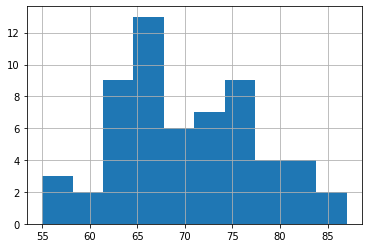

In [29]:
wnba_G['Weight'].hist()

In [30]:
# we calculate the mean weight for players in psoition G
wnba_G['Weight'].mean()

70.0677966101695

In [31]:
# and the confidence interval of the mean weight for this category
t.interval(alpha=0.95, df=(len(wnba_G)-1), loc=np.mean(wnba_G['Weight']), scale=np.std(wnba_G['Weight']))

(55.48405871065009, 84.6515345096889)

In [32]:
# Therefore, my sister has every chance of becoming a professional NBA player 
# where her weight is concerned, specially if she plays in the G position.

In [34]:
wnba_G['Height'].mean()

176.42372881355934

In [35]:
t.interval(alpha=0.95, df=(len(wnba_G)-1), loc=np.mean(wnba_G['Height']), scale=np.std(wnba_G['Height']))

(165.7983254162816, 187.04913221083706)

## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

In [8]:
# your code here

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [45]:
# your answer here
# The data set we have recollects only the data of professional female players in the NBA,
# one of the highest level of skill in basketball.
# Therefore, the results obtained are likely to misrepresent ALL female players

**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [37]:
# your code here
t.interval(alpha=0.95, df=(len(wnba)-1), loc=np.mean(wnba['FT%']), scale=np.std(wnba['FT%']))

(39.313432167425695, 112.3443143114475)

**What can you comment about our result? What would you tell your sister?**

In [15]:
#your-answer-here

In [44]:
# Here's the percentaje of player that miss more than 40% of their free throws
len(wnba[wnba['FT%']<60])/len(wnba)*100

9.859154929577464

In [ ]:
# That result completely disproves my sister's perception that most
# professional females players miss their free throws

# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

In [ ]:
#your code here

# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [49]:
#your-answer-here
wnba.head(1)

,Unnamed: 0,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0


**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [50]:
#your code here
ttest_1samp(wnba['AST'], 52, axis=0, nan_policy='propagate')

Ttest_1sampResult(statistic=-2.1499947192482898, pvalue=0.033261541354107166)

In [18]:
#your-answer-here
# the p-value is under 0.05 which means that we can reject the null hypothesis with a 95% confience level

**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [51]:
#your-answer-here
# In this case, I use the same ttest I used on the previous question, but divide the p-value by 2,
# since I'm only looking at one sample (tail).

# In order to check towards what end my hypothesis leans, I calcualte the mean of my data and compare it.
wnba['AST'].mean()
# My brother-in-law is wrong, he average assists for female professional players is NOT higher 
# than the average of both female and male players combined

44.514084507042256

# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

In [ ]:
#your code here


# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

In [22]:
#your-answer-here

In [19]:
# your code here

**What are your comments in regards to the results of the test?**

In [24]:
#your-answer-here

# Question 4: Are coaches making the best decisions for their team?


In [6]:
wnba.head()

,Unnamed: 0,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


In [12]:
team = wnba.groupby('Team').mean()
team

,Unnamed: 0,Height,Weight,BMI,Age,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
Team,,,,,,,,,,,,,,,,,,,,,,,,,,
ATL,69.727273,185.727273,77.909091,22.528013,26.909091,26.636364,569.909091,82.090909,203.181818,46.154545,12.636364,43.363636,19.345455,46.000000,60.454545,67.245455,26.272727,72.909091,99.181818,50.818182,20.545455,9.909091,36.818182,222.818182,0.454545,0.000000
CHI,49.636364,186.181818,79.454545,22.836069,27.090909,22.545455,490.909091,80.272727,166.454545,48.209091,15.727273,40.727273,23.572727,39.454545,49.181818,77.818182,24.818182,68.818182,93.636364,50.727273,13.363636,13.636364,35.636364,215.727273,2.909091,0.000000
CON,61.166667,184.750000,84.750000,24.699827,25.000000,24.583333,505.833333,79.583333,185.000000,42.366667,19.166667,54.000000,25.616667,34.500000,45.416667,80.733333,14.416667,54.750000,69.166667,47.583333,21.750000,3.666667,30.000000,212.833333,0.583333,0.000000
DAL,64.000000,186.583333,81.500000,23.296561,24.666667,20.583333,398.833333,58.166667,141.916667,38.933333,14.916667,44.416667,26.833333,38.666667,46.250000,73.300000,21.166667,49.166667,70.333333,30.333333,15.750000,8.250000,25.250000,169.916667,1.250000,0.000000
IND,70.083333,184.083333,77.000000,22.672055,28.000000,24.333333,525.250000,77.666667,186.666667,38.916667,19.666667,58.916667,24.200000,45.416667,52.416667,85.150000,13.416667,49.000000,62.416667,43.166667,17.250000,7.000000,33.250000,220.416667,0.166667,0.000000
LA,80.833333,185.833333,78.333333,22.707020,28.500000,22.666667,475.000000,75.833333,157.583333,42.200000,13.250000,37.500000,22.366667,37.000000,45.083333,69.033333,16.416667,58.833333,75.250000,44.583333,21.666667,9.083333,29.000000,201.916667,1.750000,0.083333
MIN,96.545455,183.090909,80.272727,23.903961,30.545455,26.454545,569.818182,96.000000,206.090909,44.445455,18.909091,51.181818,28.963636,50.090909,61.454545,81.427273,28.090909,68.727273,96.818182,59.272727,22.636364,11.272727,41.181818,261.000000,2.000000,0.000000
NY,79.416667,183.166667,80.833333,23.998705,26.000000,24.833333,454.083333,65.333333,152.250000,44.875000,11.666667,35.083333,19.175000,34.666667,45.333333,69.041667,23.833333,66.666667,90.500000,34.333333,11.500000,10.000000,29.416667,177.000000,1.333333,0.000000
PHO,57.416667,185.583333,77.666667,22.396297,28.500000,24.916667,515.416667,78.000000,172.333333,43.741667,12.833333,40.583333,31.325000,47.333333,57.500000,81.975000,21.583333,66.750000,88.333333,46.166667,18.083333,15.250000,34.000000,216.166667,0.916667,0.000000
